In [73]:
# 兼容Python2 和 Python3
from __future__ import division,print_function,unicode_literals

import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore",message="^internal gelsd")

# 设置绘图参数
mpl.rc("axes",labelsize=14)
mpl.rc("xtick",labelsize=12)
mpl.rc("ytick",labelsize=12)
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

# 设置图片存储路径
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

# 存储图片函数
def save_fig(fig_id,tight_layout=True):
    path=os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID,fig_id+".png")
    print("Saving figure %s"%fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format="png",dpi=300)

< 线性回归 > GDP: 22587 —————> Life satisfaction：5.96
< KNN近邻 > GDP: 22587 —————> Life satisfaction：5.58


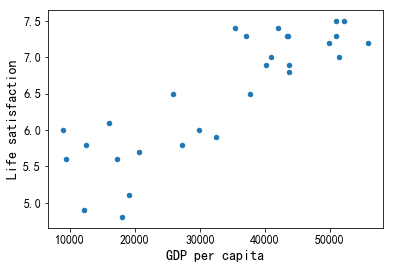

In [63]:
# 导入线性回归模块
import copy
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor as KNN

# load data
datapath = os.path.join("datasets", "lifesat", "")
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# connect the two dataframe
def prepare_country_stats(select="keep",oecd=oecd_bli.copy(), gdp=gdp_per_capita.copy()):
    if select.lower() not in ["keep","remove","full"]:
        raise ValueError("prepare_country_stats(select,*karg), select must be in ('keep','remove','full') !")
    oecd=pd.pivot_table(oecd[oecd["INEQUALITY"]=="TOT"],columns="Indicator",index="Country",values="Value")
    gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp.set_index("Country",inplace=True)
    # 连表
    full_country_stats = pd.merge(left=oecd, right=gdp,
                                  left_index=True, right_index=True).sort_values(by="GDP per capita")
    remove_indices=[0, 1, 6, 8, 33, 34, 35]
    keep_indices=list(set(range(36))-set(remove_indices))
    if select.lower()=="keep":
        return full_country_stats[["GDP per capita","Life satisfaction"]].iloc[keep_indices]
    elif select.lower()=="remove":
        return full_country_stats[["GDP per capita","Life satisfaction"]].iloc[remove_indices]
    else:
        return full_country_stats[["GDP per capita","Life satisfaction"]]

country_stats = prepare_country_stats()
# set model data
X=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

%matplotlib inline
country_stats.plot(kind="scatter",x="GDP per capita",y="Life satisfaction")

# 训练模型
model=LR()
model.fit(X,y)

# 预测新值
X_new=[[22587]]
print("< 线性回归 > GDP: %d —————> Life satisfaction：%.2f"%(X_new[0][0],model.predict(X_new)[0][0]))

# k近邻算法
clf=KNN()
clf.fit(X,y)
print("< KNN近邻 > GDP: %d —————> Life satisfaction：%.2f"%(X_new[0][0],clf.predict(X_new)[0][0]))

In [67]:
full_country_stats=prepare_country_stats("full",oecd_bli.copy(),gdp_per_capita.copy())

# 分割数据
remove_indices=[0, 1, 6, 8, 33, 34, 35]
keep_indices=list(set(range(36))-set(remove_indices))

sample_data=full_country_stats.iloc[keep_indices]
miss_data=full_country_stats.iloc[remove_indices]

full_country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


Saving figure money_happy_scatterplot


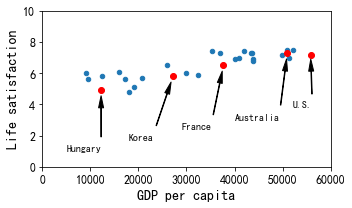

In [74]:
# 绘图
sample_data.plot(kind="scatter",x="GDP per capita",y="Life satisfaction",figsize=(5,3))
plt.axis([0,60000,0,10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('money_happy_scatterplot')

In [75]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))